In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# STEP #1: IMPORTING DATA & get intuition about dataset

In [2]:
df_app = pd.read_csv("appdata10.csv")

In [3]:
df_app.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
df_app.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


# STEP #2: DATA CLEANING
- convert hour colum into int

In [5]:
if df_app['hour'].dtype != np.int32:
    df_app['hour'] = df_app['hour'].str.slice(1,3).astype(int)

df_app_BKUP = df_app.copy()
df_app2 = df_app.copy().drop(columns= ['user', 'screen_list', 'enrolled_date', 'first_open'])


In [6]:
df_app2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


# STEP #3: VISUALIZING THE DATA

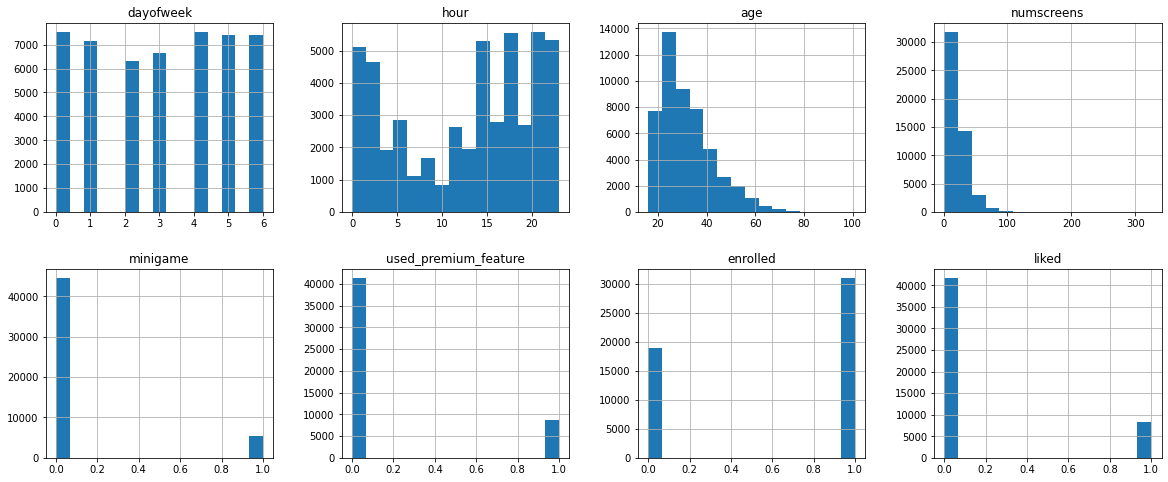

In [7]:
fig, axis = plt.subplots(2, 4, figsize=(20,8))
df_app2.hist(ax=axis, bins=15)
plt.show()

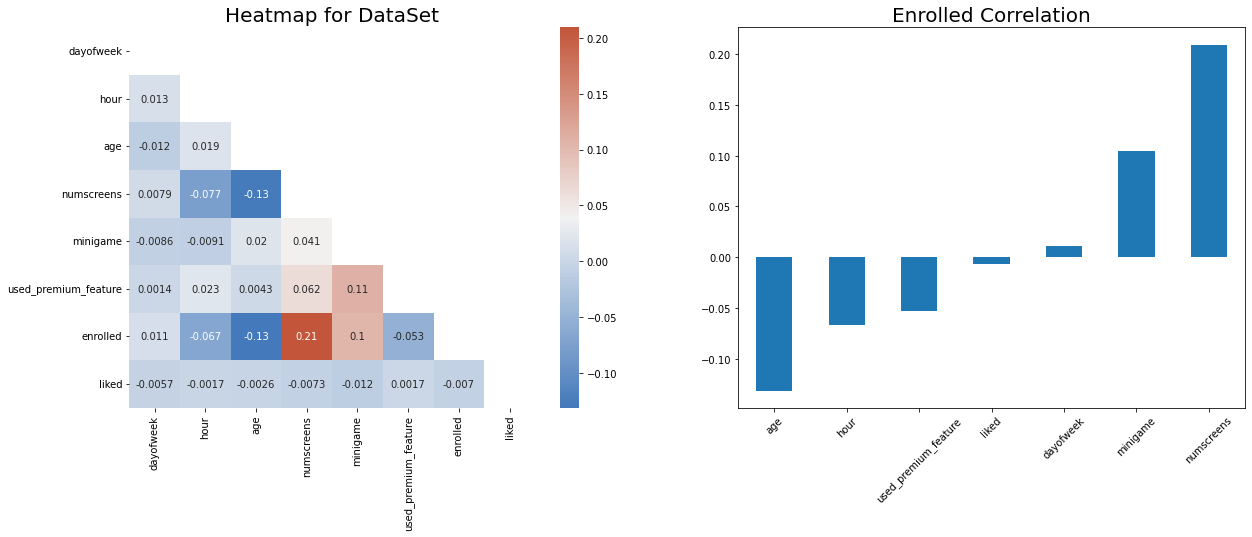

In [8]:
fig, axis = plt.subplots(1, 2, figsize=(20,7))
plt.subplot(1,2,1)
plt.title('Heatmap for DataSet', size=20)
corr = df_app2.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(corr,mask=mask, annot=True, cmap=cmap);


plt.subplot(1,2,2)
plt.title('Enrolled Correlation', size=20)
df_app2.corr()['enrolled'].sort_values()[:-1].plot.bar(rot=45);

# STEP #4: FEATURE ENGINEERING
- add feature difference

In [9]:
df_app.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [10]:
df_app['first_open'] = df_app['first_open'].astype(np.datetime64)
df_app['enrolled_date'] = df_app['enrolled_date'].astype(np.datetime64)

In [11]:
df_app['difference'] = (df_app['enrolled_date'] - df_app['first_open']).astype('timedelta64[h]')

In [12]:
df_app.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


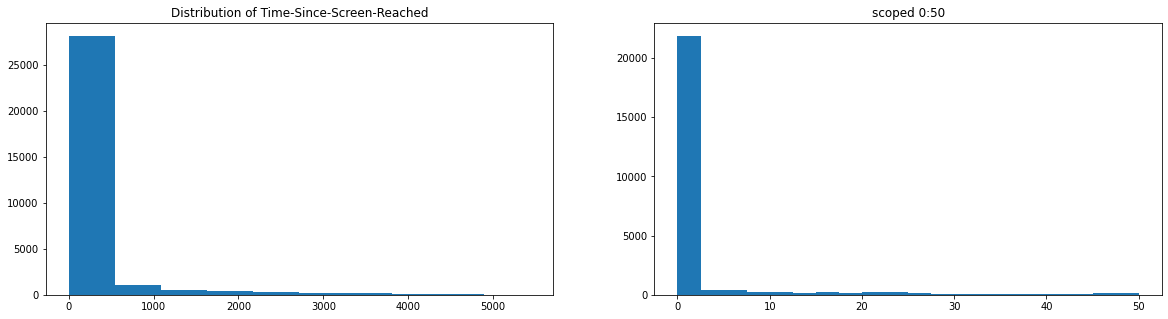

In [13]:
plt.subplots(1, 2, figsize=(20,5))
plt.subplot(1,2,1)

plt.hist(df_app['difference']);
plt.title('Distribution of Time-Since-Screen-Reached');

plt.subplot(1,2,2)
plt.hist(df_app['difference'], range=[0,50], bins=20);
plt.title('scoped 0:50');


In [14]:
df_app.loc[df_app.difference > 48, 'enrolled'] = 0
df_app = df_app.drop(columns= ['enrolled_date', 'first_open', 'difference'])

In [15]:
df_app.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [16]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [17]:
df_app["screen_list"] = df_app.screen_list.astype(str) + ','
for sc in top_screens:
    df_app[sc] = df_app.screen_list.str.contains(sc).astype(int)
    df_app['screen_list'] = df_app.screen_list.str.replace(sc+",", "")

df_app['Other'] = df_app.screen_list.str.count(",")
df_app = df_app.drop(columns=['screen_list'])

In [18]:
df_app.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [19]:
savings_screens = ["Saving1","Saving2","Saving2Amount","Saving4","Saving5","Saving6","Saving7","Saving8","Saving9","Saving10"]
df_app["SavingCount"] = df_app[savings_screens].sum(axis=1)
df_app = df_app.drop(columns=savings_screens)

In [20]:
cm_screens = ["Credit1","Credit2","Credit3","Credit3Container","Credit3Dashboard"]
df_app["CMCount"] = df_app[cm_screens].sum(axis=1)
df_app = df_app.drop(columns=cm_screens)

In [21]:
cc_screens = ["CC1","CC1Category","CC3"]
df_app["CCCount"] = df_app[cc_screens].sum(axis=1)
df_app = df_app.drop(columns=cc_screens)


In [22]:
loan_screens = ["Loan","Loan2","Loan3","Loan4"]
df_app["LoansCount"] = df_app[loan_screens].sum(axis=1)
df_app = df_app.drop(columns=loan_screens)

In [23]:
df_app.head(10)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
5,56480,2,9,20,14,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,1
6,144649,1,2,35,3,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
7,249366,1,3,26,41,0,1,0,0,0,...,0,0,1,0,0,8,0,2,0,1
8,372004,2,14,29,33,1,1,0,0,1,...,0,0,0,0,0,19,0,0,0,3
9,338013,4,18,26,19,0,0,1,0,1,...,0,0,0,0,0,11,0,0,0,1


In [24]:
df_app.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [25]:
df_app.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [26]:
df_app.to_csv('cleaned_appdata10.csv', index = False)